In [2]:
# 1. imports
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report
import pandas as pd
import json
import importlib
import math

try:
    from IPython import get_ipython
    if 'IPKernelApp' not in get_ipython().config:  # Not in a notebook
        from tqdm import tqdm
    else:  # In a notebook
        from tqdm.notebook import tqdm
except ImportError:  # IPython is not installed
    from tqdm import tqdm
import utils
from utils import get_accuracy, run_training_and_validation, plot_single_train_val_smoothed, run_testing, BaselineNet, print_all_averaged_runs_together_from_file, print_sep_runs_from_file, DropoutNet

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
# results = {0.1: {'seeds':random_seeds,
#         'av_train_losses': [list of av train loss per epoch across the 5 runs len = [1,50],
#         'av_val_losses': [list of av val loss per epoch across the 5 runs len = [1,50],
#         'av_train_acc':[list of av train acc per epoch across the 5 runs len = [1,50],
#         'av_val_acc':[list of av val acc per epoch across the 5 runs len = [1,50],
#         'all_train_losses':[epoch_train_losses_by_run, shape is [5, 50]],
#         'all_val_losses':[ epoch_val_losses_by_run, shape is [5, 50]],
#         'all_train_accuracies':[epoch_train_accuracies_by_run, shape is [5, 50]],
#         'all_val_accuracies':[epoch_val_accuracies_by_run], shape is [5, 50]},
#         'all_test_losses':[5] shape of test losses for each run, 
#         'all_test_accuracies':[5] shape of test accuracies for each run,
#         'av_test_loss': INT average test loss for the lr,
#         'av_test_accuracy':INT average test acc for the lr}

# 0.01: {'seeds':random_seeds,
#         'av_train_losses': average_train_losses,
#         'av_val_losses': average_val_losses,
#         'av_train_acc': average_train_accuracies,
#         'av_val_acc': average_val_accuracies,
#         'all_train_losses':epoch_train_losses_by_run,
#         'all_val_losses': epoch_val_losses_by_run,
#         'all_train_accuracies': epoch_train_accuracies_by_run,
#         'all_val_accuracies': epoch_val_accuracies_by_run},
#         'all_test_losses':[5] shape of test losses for each run, 
#         'all_test_accuracies':[5] shape of test accuracies for each run,
#         'av_test_loss': INT average test loss for the lr,
#         'av_test_accuracy':INT average test acc for the lr}
#         
# 0.001...}

In [130]:
path_to_load = f'./run_data/lr_data.json'
with open(path_to_load, 'r') as file:
    averaged_results = json.load(file)

In [131]:
# plot_single_model_performance(averaged_results['0.1'], title='Training and Validation losses and accuracy for Learning Rate = 0.1', enforce_axis_range=True)

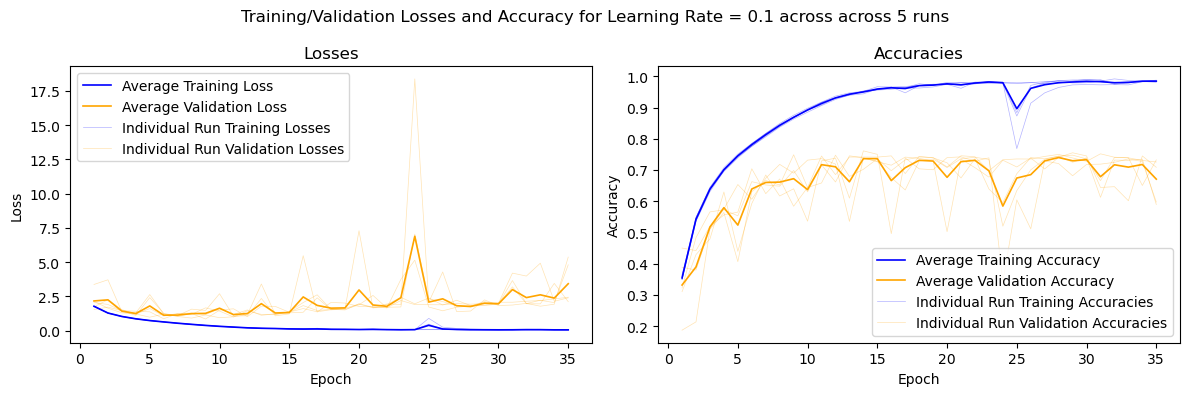

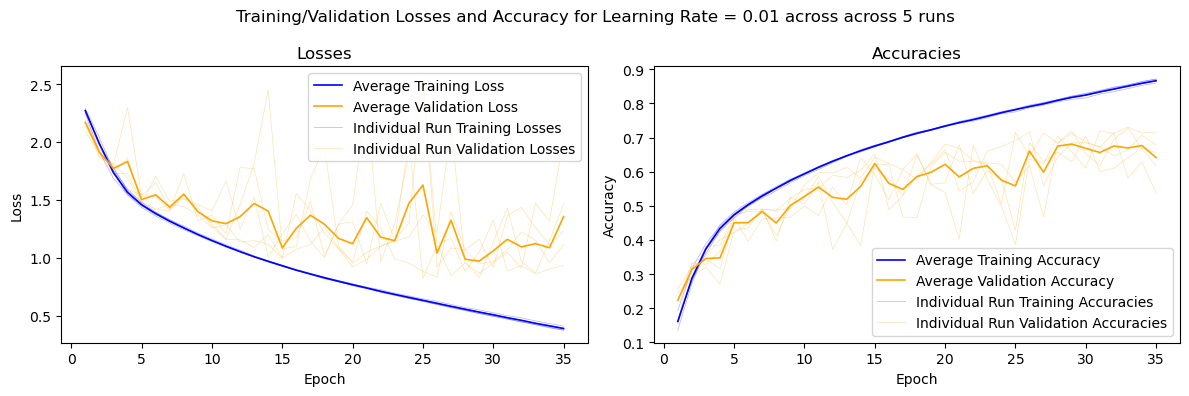

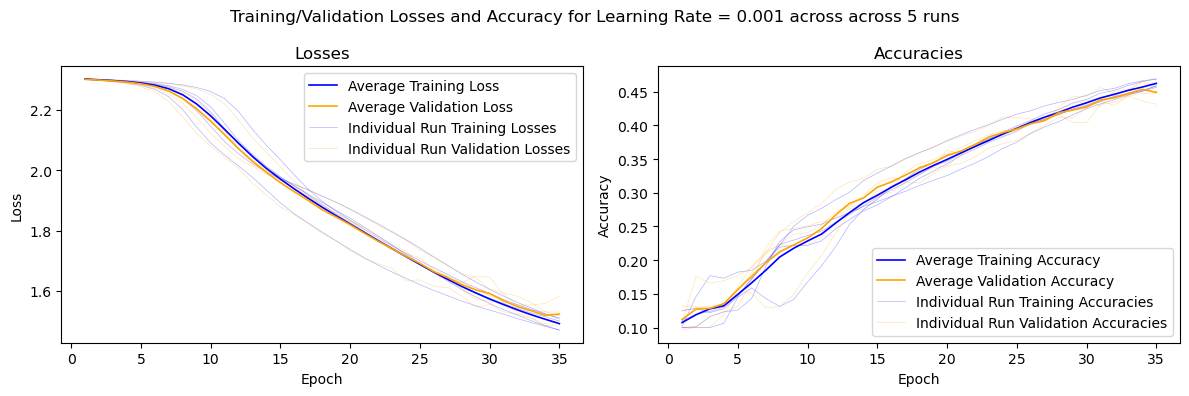

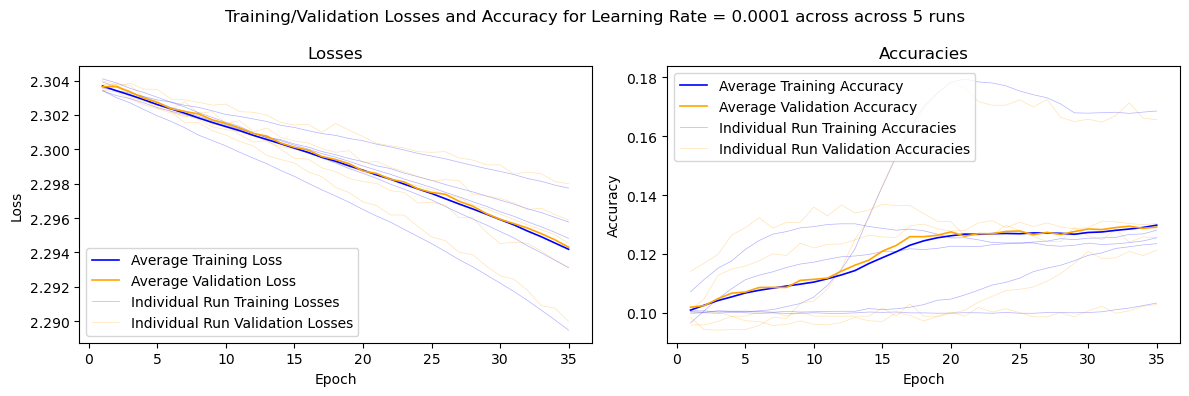

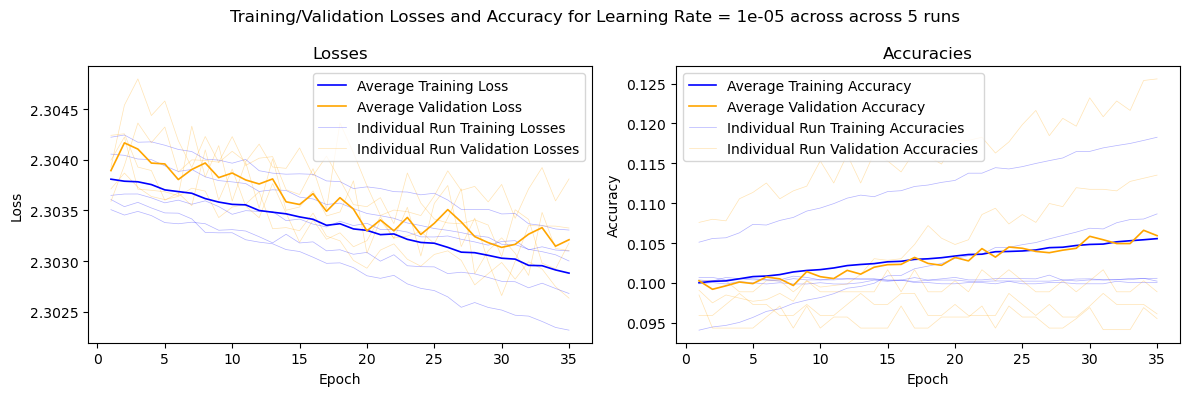

In [143]:
plot_all_models_performance_from_disk(path_to_load, variable_name='Learning Rate', enforce_axis_range=False)

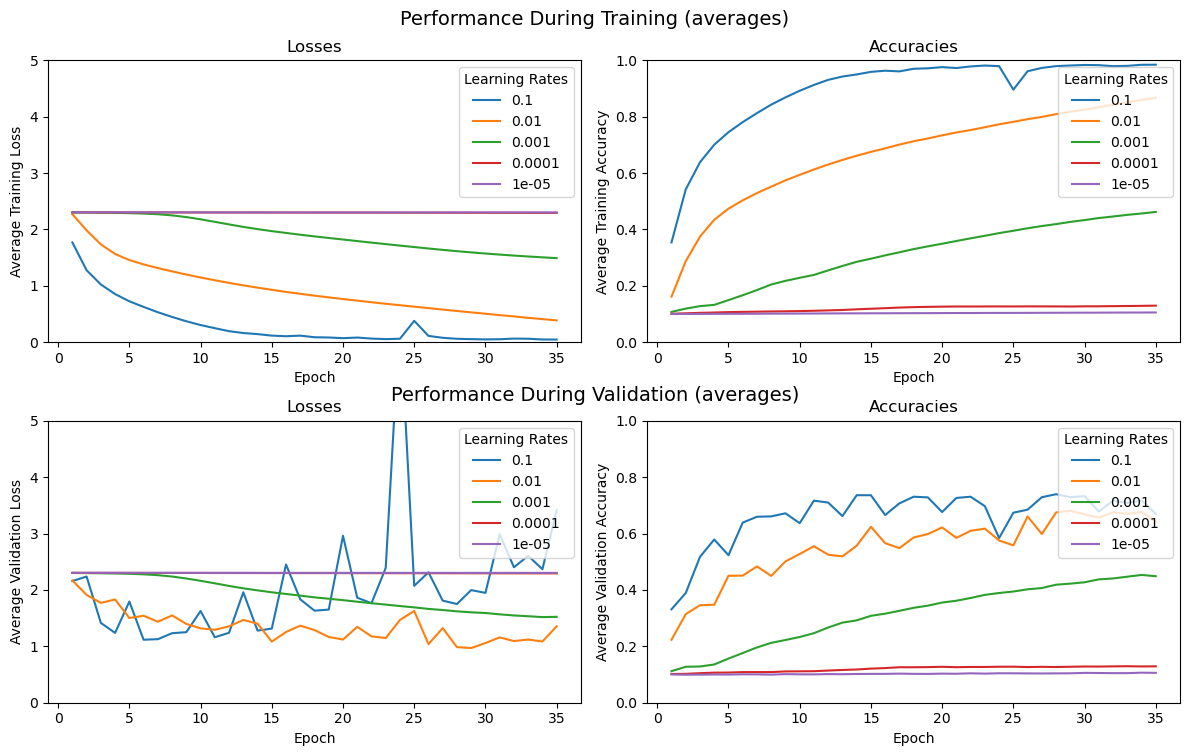

In [157]:
plot_performance_comparison_from_file(path_to_load, enforce_axis_bounds=True)

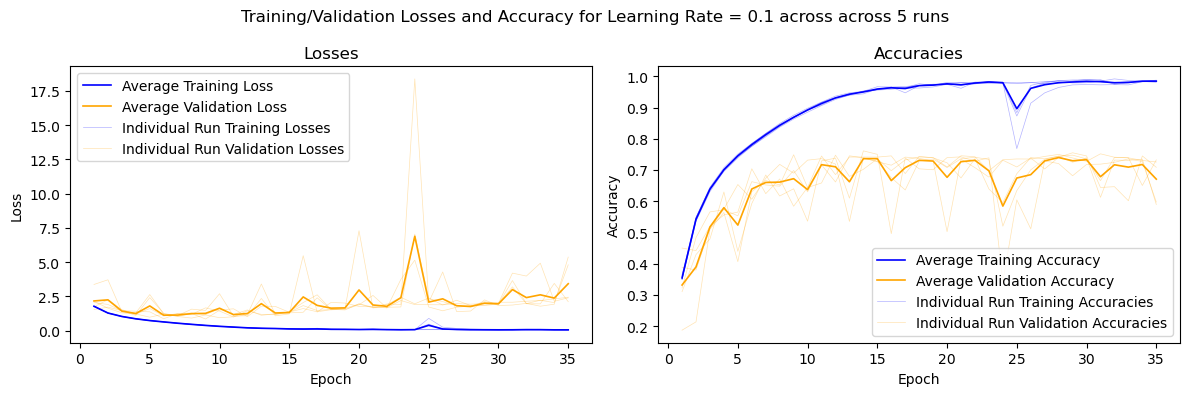

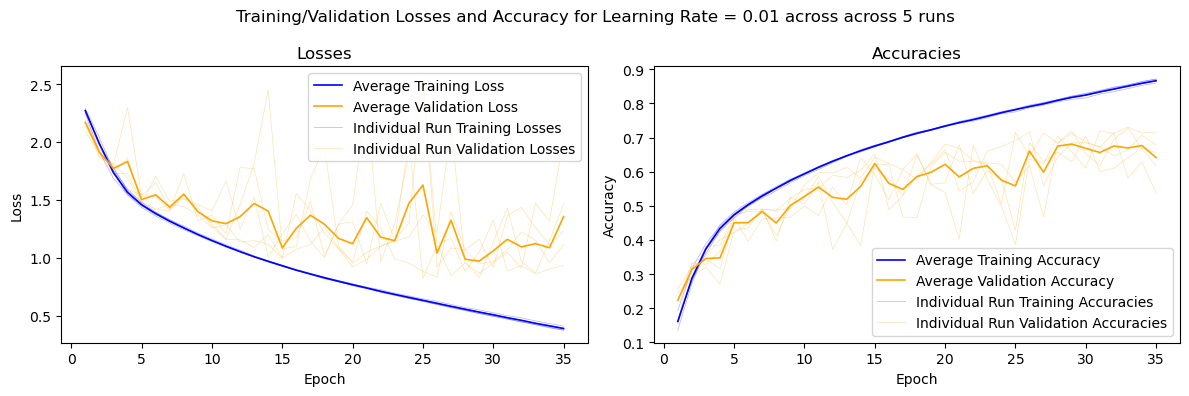

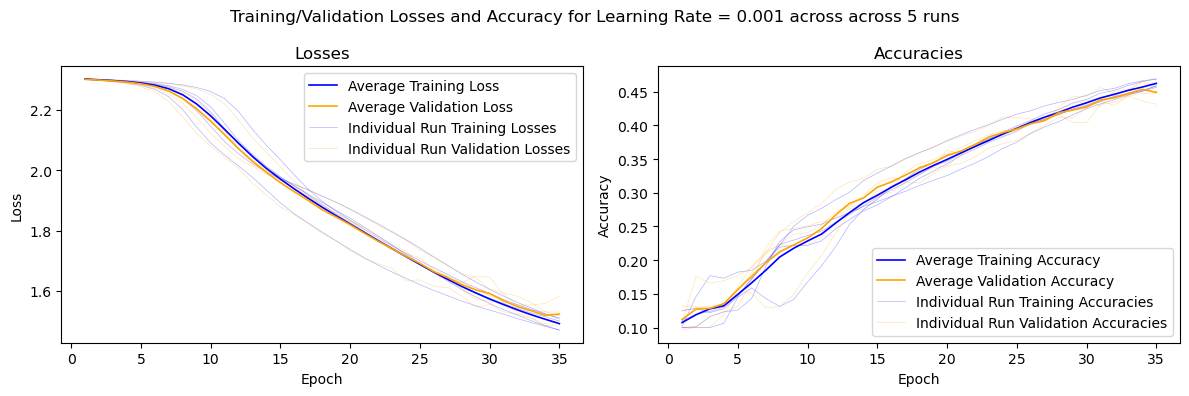

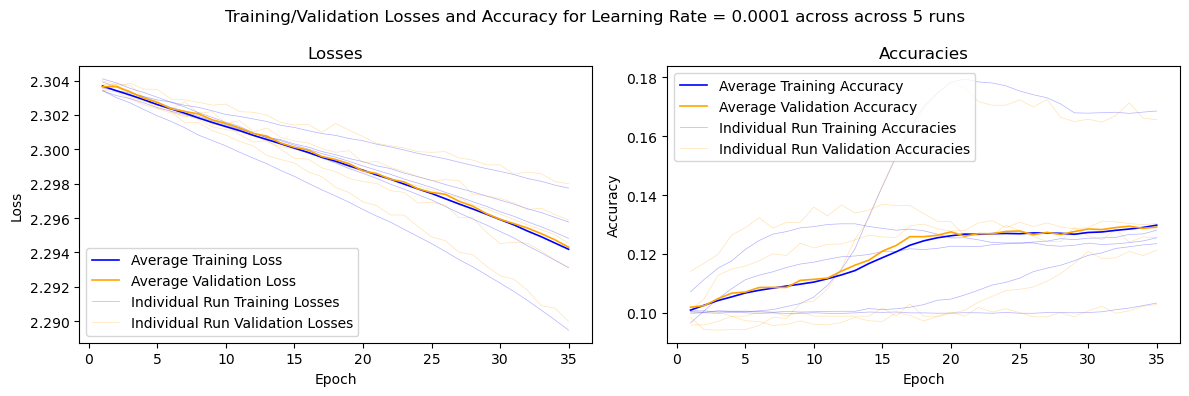

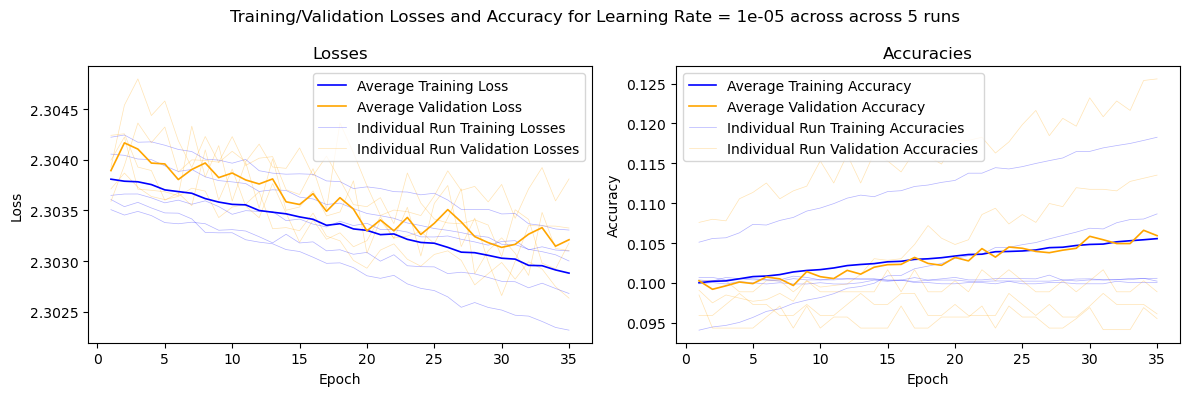

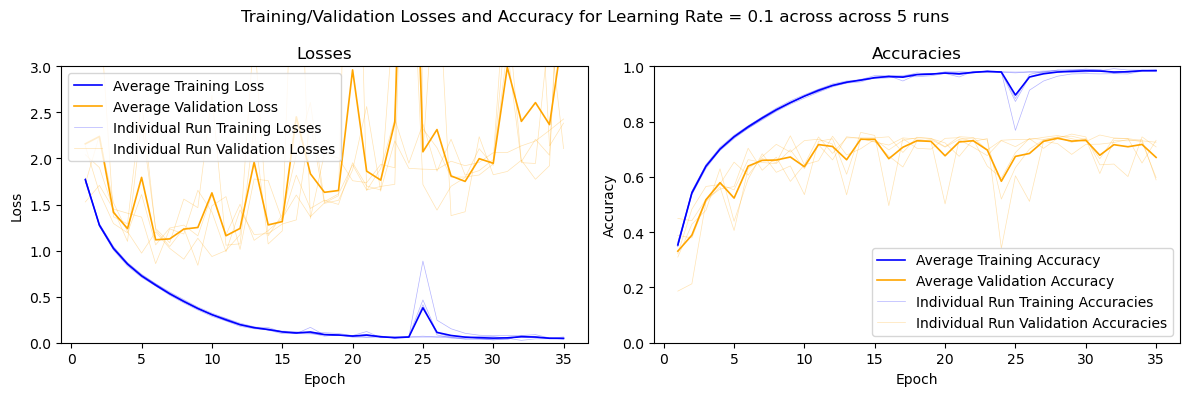

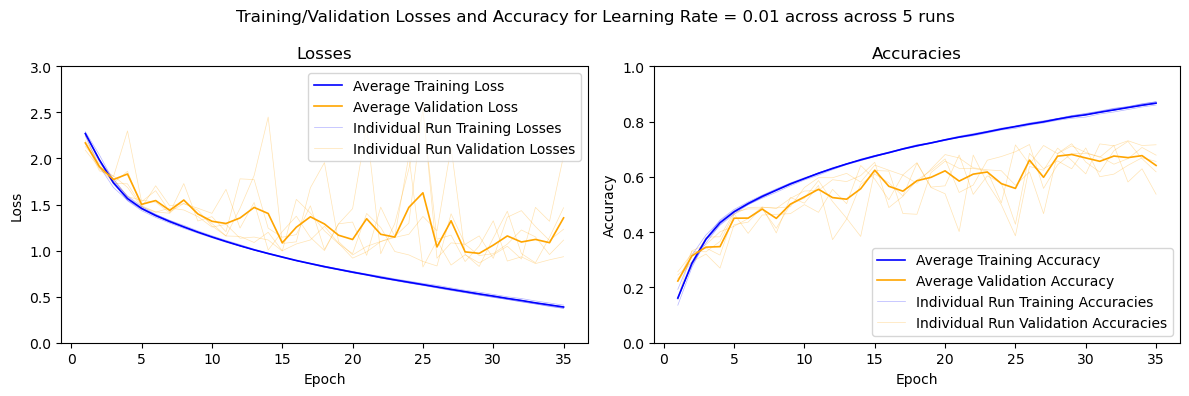

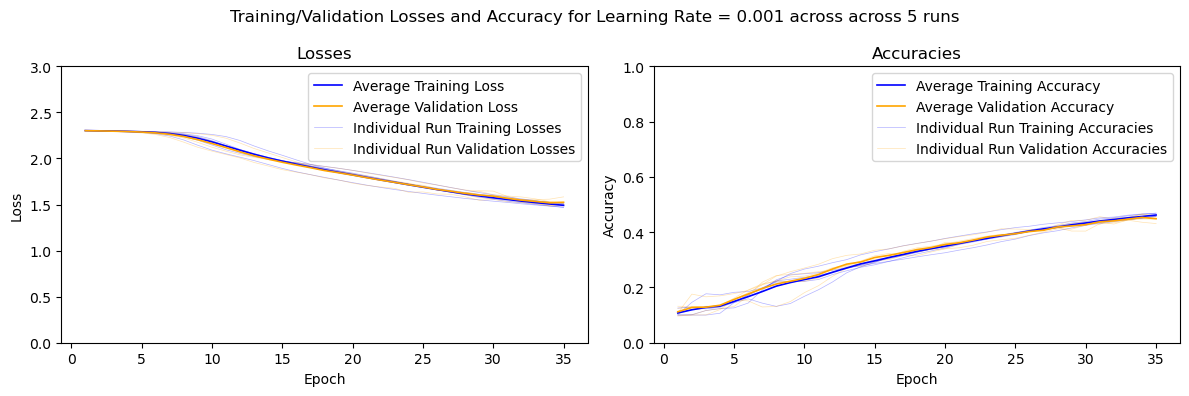

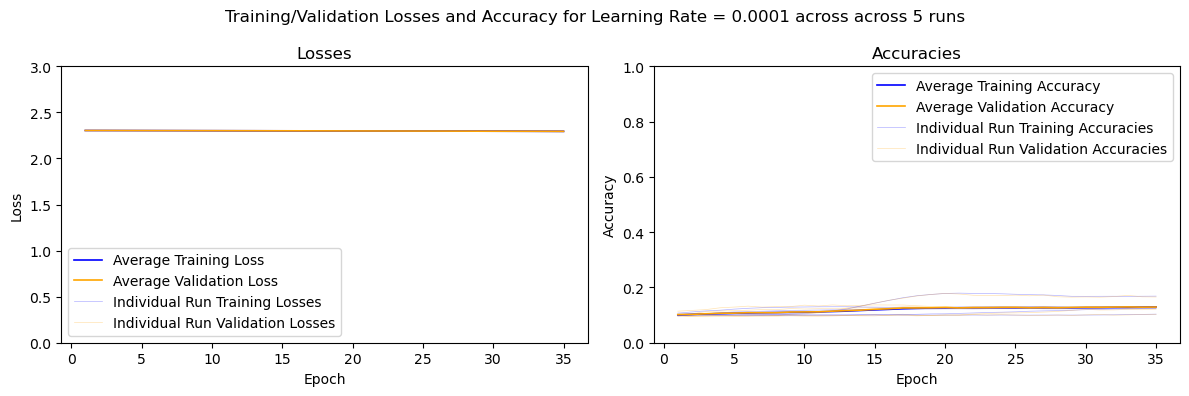

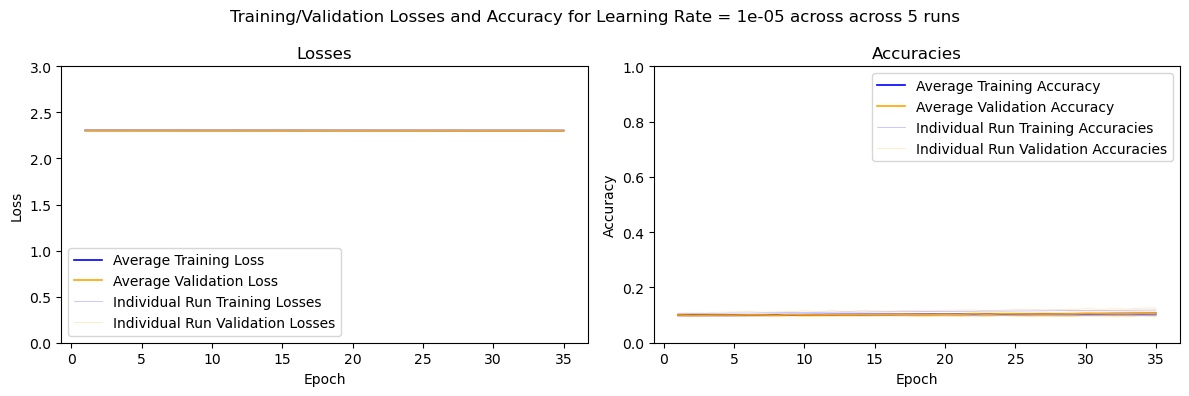

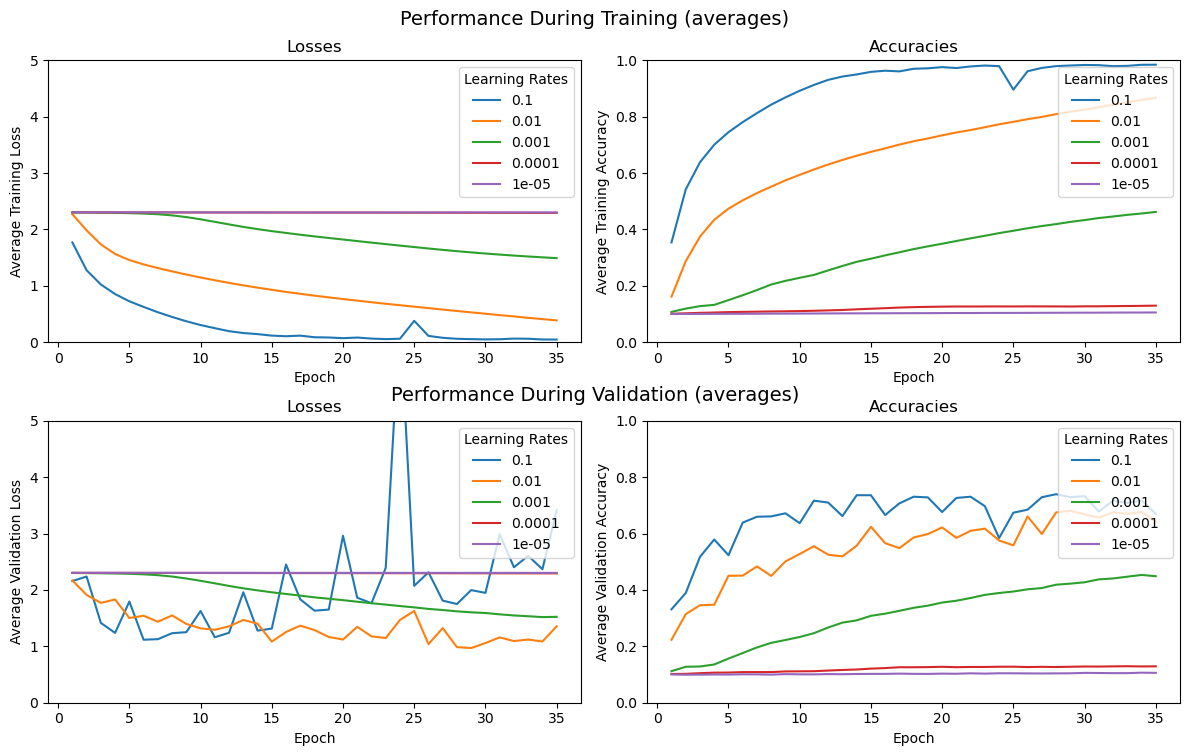

In [155]:
path_to_load = f'run_data\lr_data_35_epochs.json'
plot_all_models_performance_from_disk(path_to_load, variable_name='Learning Rate', enforce_axis_range=False)
plot_all_models_performance_from_disk(path_to_load, variable_name='Learning Rate', enforce_axis_range=True)
plot_performance_comparison_from_file(path_to_load, enforce_axis_bounds=True)